# 8장 범주형 데이터 분석

## 8.2 적합도 검정
### 분석 및 해석

A쇼핑은 클레임고객들의 구매 패턴이 어떻게 다른지 파악하고자 클레임 고객들의 구매유형 별 비율의 적합도 검정을 시행하고자 한다. 기존에 알려진 A 쇼핑의 클레임고객들의 구매 유형별 비율은 1회성 구매형 고객 10%, 실용적 구매형 30%, 명품 구매형 20%, 그리고 집중 구매형 40%로 알려 있었다.

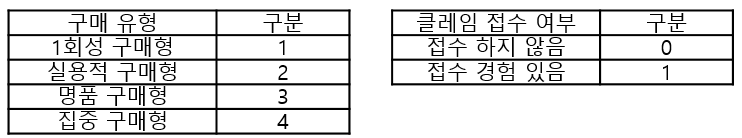

이를 위한 가설수립은 다음과 같이 할 수 있다. 

#### H0 (귀무가설)= 클레임 접수 고객의 구매유형별 비율은 1회성 구매형 10%, 실용적 구매형 30%, 명품 구매형 20%, 집중 구매형 40%이다.
#### H1 (연구가설)= 클레임 접수 고객의 구매유형별 비율은 1회성 구매형 10%, 실용적 구매형 30%, 명품 구매형 20%, 집중 구매형 40%이 아니다. 


In [1]:
#1. 모듈 및 데이터 탑재
import pandas as pd
import numpy as np
from scipy import stats
df = pd.read_csv('Ashopping.csv', sep=',', encoding='CP949')

#2. 빈도교차표 생성하기
X=pd.crosstab(df.클레임접수여부, df.구매유형, margins=True)
X

구매유형      1    2    3    4   All
클레임접수여부                         
0        24  197   57  263   541
1        19  120   87  233   459
All      43  317  144  496  1000

In [2]:
#1. 관측도수, 기대도수 추출하기
Ob = X.values[1,:4]
Pr = np.array([0.1,0.3,0.2,0.4])
n= X.values[1,4]
E= n*Pr

#2. 카이제곱 적합도 검정하기
stats.chisquare(Ob, E)


Power_divergenceResult(statistic=31.582788671023955, pvalue=6.407672361002909e-07)

## 8.3 독립성 검정
### 분석 및 해석

A쇼핑의 클레임 문제를 다시 한번 다루어 보자. A쇼핑은 이번에 클레임을 제기하는 고객은 성별과 무관하지 않을 것 같다는 전제를 가지고 클레임 접수여부와 성별간의 독립성 검정을 수행해보고자 한다. 


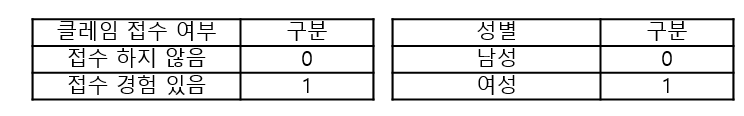

이를 위한 가설 수립은 다음과 같이 할 수 있다. 
#### H0 (귀무가설)= 클레임 접수 여부와 성별은 연관성이 없다.
#### H1 (연구가설)= 클레임 접수 여부와 성별은 연관성이 있다.

In [2]:
#1. 모듈 및 데이터 탑재
import pandas as pd
import numpy as np
from scipy import stats
df = pd.read_csv('Ashopping.csv', sep=',', encoding='CP949')

#2. 빈도교차표 생성하기
X=pd.crosstab(df.성별, df.클레임접수여부, margins=False)

#3. 카이제곱 독립성 검정하기
stats.chi2_contingency(X)


(106.43790651350751, 5.911607287197053e-25, 1, array([[ 80.609,  68.391],
        [460.391, 390.609]]))

## 8.4 동질성 검정
### 분석 및 해석

A쇼핑은 자사가 관리하는 구매유형 4가지의 비율이 청년층 그룹과 중장년층 그룹에 따라 동질적인지 검토하여 연령대별 마케팅 전략에 활용하고자 한다. 이를 위해 고객연령 그룹에 대한 구매유형 비율의 동질성 검정을 실시해보자.

A쇼핑에서 사용하는 고객 구매유형과 고객 나이대에 대한 코드는 아래 표와 같다.

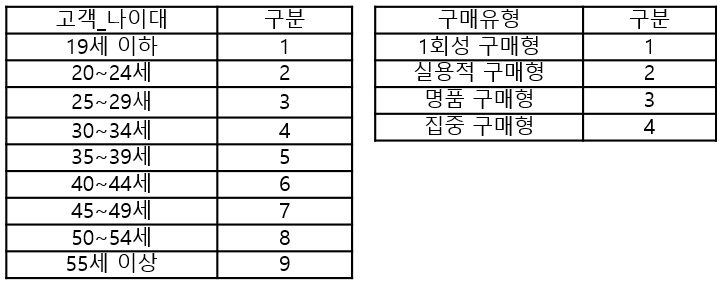


고객 연령대는 총 9개의 세부 그룹으로 이루어져 있으나, 39세 이하를 청년층 그룹으로, 40세 이상을 중장년층 그룹으로 분류하여 두 개의 다른 모집단에서 추출한 표본이라고 간주하고 실습을 진행해보자.

이를 위한 가설 수립은 다음과 같이 할 수 있다. 

#### H0 (귀무가설)= 청년층과 중장년층의 구매 유형 비율은 동일하다.
#### H1 (연구가설)= 청년층과 중장년층의 구매 유형 비율은 동일하지 않다.

In [3]:
#1. 모듈 및 데이터 탑재
import pandas as pd
import numpy as np
from scipy import stats
df = pd.read_csv('Ashopping.csv', sep=',', encoding='CP949')

#2. 청년층, 중장년층 전처리
df["고객연령대"] = ""
df.고객연령대[df.고객_나이대 == 1] = "1"
df.고객연령대[df.고객_나이대 == 2] = "1"
df.고객연령대[df.고객_나이대 == 3] = "1"
df.고객연령대[df.고객_나이대 == 4] = "1"
df.고객연령대[df.고객_나이대 == 5] = "1"
df.고객연령대[df.고객_나이대 == 6] = "2"
df.고객연령대[df.고객_나이대 == 7] = "2"
df.고객연령대[df.고객_나이대 == 8] = "2"
df.고객연령대[df.고객_나이대 == 9] = "2"

#3. 두 모집단 랜덤표본추출
df1 = df.loc[df.고객연령대=='1']
df2 = df.loc[df.고객연령대=='2']
df1_sample = df1.sample(200, random_state = 29)
df2_sample = df2.sample(200, random_state = 29)
df3 = df1_sample.append(df2_sample) 

#4. 빈도교차표 생성하기
X = pd.crosstab(df3.고객연령대, df3.구매유형, margins=False)

#5. 카이제곱 동질성 검정하기
stats.chi2_contingency(X)


C:\Users\Seungwoo\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\Seungwoo\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Seungwoo\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is 

(8.714970024248375, 0.033330661685866646, 3, array([[ 9., 66., 28., 97.],
        [ 9., 66., 28., 97.]]))

In [4]:
#1. 빈도교차표 출력하기
X

구매유형    1   2   3    4
고객연령대                 
1      10  67  18  105
2       8  65  38   89